# Tarea 4. Midiendo rendimiento y riesgo en un portafolio.

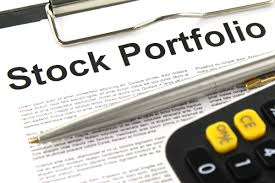

**Resumen.**
> En esta tarea, calcularás medidas de rendimiento esperado diario y volatilidad para cuatro diferentes portafolios. Usarás los históricos de precios que ya descargaste en la tarea anterior.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea4_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea4_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (10 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), Microsoft (MSFT), Walgreens (WBA), y Tesla Motors (TSLA) durante el periodo comprendido del primero de enero del 2015 hasta el día en que realicen la tarea.

1. Mostrar el DataFrame de los precios diarios (2 puntos).
2. Graficar los precios (3 puntos).
3. Mostrar el DataFrame de los rendimientos porcentuales diarios (2 puntos).
4. Graficar los rendimientos (3 puntos).

In [82]:
import pandas_datareader.data as web
import yfinance as yf
import pandas as pd
import numpy as np
%matplotlib inline

yf.pdr_override()

In [83]:
def get_closes(tickers, start_date=None, end_date=None):
    closes = web.get_data_yahoo(tickers=tickers, start=start_date, end=end_date)['Adj Close']
    closes.sort_index(inplace=True)
    return closes

tickers = ["^GSPC", "MSFT", "WBA", "TSLA"]
closes = get_closes(tickers, "2015-01-01")
closes

[*********************100%***********************]  4 of 4 completed


,MSFT,TSLA,WBA,^GSPC
Date,,,,
2015-01-02,40.709461,14.620667,59.285881,2058.199951
2015-01-05,40.335117,14.006000,58.115780,2020.579956
2015-01-06,39.743095,14.085333,58.264000,2002.609985
2015-01-07,40.248043,14.063333,59.753948,2025.900024
2015-01-08,41.432072,14.041333,60.495029,2062.139893
...,...,...,...,...
2023-02-13,270.642120,194.639999,36.625298,4137.290039
2023-02-14,271.490021,209.250000,36.270000,4136.129883
2023-02-15,269.320007,214.240005,36.520000,4147.600098


<AxesSubplot:xlabel='Date'>

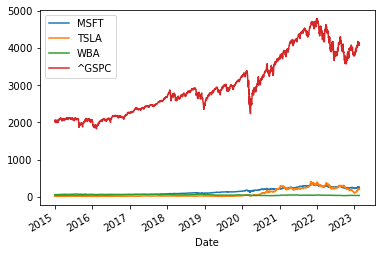

In [84]:
closes.plot()

In [85]:
ret = closes.pct_change().dropna()
ret

,MSFT,TSLA,WBA,^GSPC
Date,,,,
2015-01-05,-0.009196,-0.042041,-0.019737,-0.018278
2015-01-06,-0.014678,0.005664,0.002550,-0.008893
2015-01-07,0.012705,-0.001562,0.025572,0.011630
2015-01-08,0.029418,-0.001564,0.012402,0.017888
2015-01-09,-0.008406,-0.018802,-0.024242,-0.008404
...,...,...,...,...
2023-02-13,0.031243,-0.011428,0.015321,0.011449
2023-02-14,0.003133,0.075062,-0.009701,-0.000280
2023-02-15,-0.007993,0.023847,0.006893,0.002773


<AxesSubplot:xlabel='Date'>

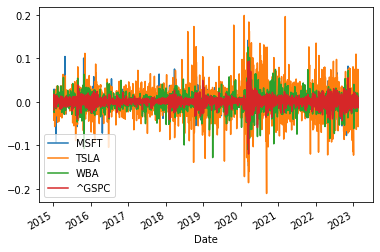

In [86]:
ret.plot()

## 2. Rendimiento esperado y volatilidad para cada activo (20 puntos)

Usando los datos de rendimientos diarios de MSFT, WBA, y TSLA:

1. Reportar en un DataFrame el rendimiento esperado diario y la volatilidad diaria para cada activo. Reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada activo (10 puntos).
2. Calcular la matriz de varianza-covarianza (base diaria) para los activos MSFT, WBA, y TSLA (5 puntos).
3. Calcular la matriz de correlación (base diaria) para los activos MSFT, WBA, y TSLA (5 puntos).

Para este punto, investigar los métodos `cov` y `corr` de los objetos tipo `pd.DataFrame`.

In [120]:
ret = ret.drop(["^GSPC"], axis=1)
datad = pd.DataFrame({"Rendimiento m": ret.mean(), "Volatilidad": ret.std()}).T
datad

,MSFT,TSLA,WBA
Rendimiento m,0.001061,0.001947,-0.000058
Volatilidad,0.017797,0.036025,0.018695


In [121]:
dataa = pd.DataFrame({"Rendimiento m": ret.mean()*252, "Volatilidad": ret.std()*(252)**0.5}).T
dataa

,MSFT,TSLA,WBA
Rendimiento m,0.267430,0.490542,-0.014609
Volatilidad,0.282526,0.571876,0.296779


In [122]:
covt = pd.DataFrame.cov(ret)
covt

,MSFT,TSLA,WBA
MSFT,0.000317,0.000269,0.000127
TSLA,0.000269,0.001298,0.000119
WBA,0.000127,0.000119,0.000350


In [123]:
corrt = pd.DataFrame.corr(ret)
corrt

,MSFT,TSLA,WBA
MSFT,1.000000,0.420203,0.380252
TSLA,0.420203,1.000000,0.177085
WBA,0.380252,0.177085,1.000000


## 3. Rendimiento esperado y volatilidad para portafolios (45 puntos)

1. Calcular los rendimientos diarios de los siguientes portafolios. Reportar en un DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior tratando cada portafolio como si fuera un activo individual (20 puntos).
 - Portafolio 1: igualmente ponderado entre MSFT, WBA, y TSLA.
 - Portafolio 2: 30% MSFT, 20% WBA, y 50% TSLA.
 - Portafolio 3: 50% MSFT, 30% WBA, y 20% TSLA.
 - Portafolio 4: 20% MSFT, 50% WBA, y 30% TSLA.
2. Para cada uno de los anteriores portafolios, reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior mediante las fórmulas de rendimiento esperado y volatilidad para portafolios derivadas en clase (20 puntos).
3. Comparar los resultados del punto uno con los del punto dos (5 puntos).

In [124]:
ret["p1"] = (ret["MSFT"] + ret["WBA"] + ret["TSLA"])/3
ret["p2"] = 0.3*ret["MSFT"] + 0.2*ret["WBA"] + 0.5*ret["TSLA"]
ret["p3"] = 0.5*ret["MSFT"] + 0.3*ret["WBA"] + 0.2*ret["TSLA"]
ret["p4"] = 0.2*ret["MSFT"] + 0.5*ret["WBA"] + 0.3*ret["TSLA"]
ret

,MSFT,TSLA,WBA,p1,p2,p3,p4
Date,,,,,,,
2015-01-05,-0.009196,-0.042041,-0.019737,-0.023658,-0.027726,-0.018927,-0.024320
2015-01-06,-0.014678,0.005664,0.002550,-0.002154,-0.001061,-0.005441,0.000039
2015-01-07,0.012705,-0.001562,0.025572,0.012239,0.008145,0.013712,0.014859
2015-01-08,0.029418,-0.001564,0.012402,0.013419,0.010524,0.018117,0.011615
2015-01-09,-0.008406,-0.018802,-0.024242,-0.017150,-0.016771,-0.015236,-0.019443
...,...,...,...,...,...,...,...
2023-02-13,0.031243,-0.011428,0.015321,0.011712,0.006723,0.017932,0.010481
2023-02-14,0.003133,0.075062,-0.009701,0.022831,0.036531,0.013669,0.018295
2023-02-15,-0.007993,0.023847,0.006893,0.007582,0.010904,0.002841,0.009002


In [125]:
pdataa = pd.DataFrame({"Rendimiento m": ret[["p1", "p2", "p3", "p4"]].mean()*252, "Volatilidad": ret[["p1", "p2", "p3", "p4"]].std()*(252)**0.5}).T
pdataa

,p1,p2,p3,p4
Rendimiento m,0.247788,0.322578,0.227441,0.193344
Volatilidad,0.289559,0.350246,0.260219,0.279618


In [126]:
w = [np.array([1/3, 1/3, 1/3]), np.array([0.3, 0.5, 0.2]), np.array([0.5, 0.2, 0.3]), np.array([0.2, 0.3, 0.5])]
pdataa_lin = pd.DataFrame(index=["Rendimiento m", "Volatilidad"])
for i in range(4):
    pdataa_lin["p{}".format(i+1)] = [w[i].T.dot(dataa.iloc[0]), ((w[i].T.dot(covt).dot(w[i]))**0.5)*(252)**0.5]
pdataa_lin

,p1,p2,p3,p4
Rendimiento m,0.247788,0.322578,0.227441,0.193344
Volatilidad,0.289559,0.350246,0.260219,0.279618


In [127]:
pdataa - pdataa_lin

,p1,p2,p3,p4
Rendimiento m,4.163336e-16,6.106227e-16,2.775558e-16,1.110223e-16
Volatilidad,-1.110223e-16,-2.220446e-16,-5.551115e-17,1.110223e-16


## 4. Gráfico de rendimientos esperados vs. volatilidad (25 puntos)

1. Crear un gráfico de puntos que muestre el rendimiento esperado y la volatilidad para cada uno de los activos, el índice S&P500, y los cuatro portafolios en el espacio rendimiento esperado (eje y) contra volatilidad (eje x). Etiquetar cada uno de los puntos y los ejes apropiadamente (15 puntos).
2. ¿Qué puede concluir acerca de la posición en el gráfico de los portafolios respecto a los activos? (10 puntos)

In [128]:
from matplotlib import pyplot as pt 
%matplotlib inline

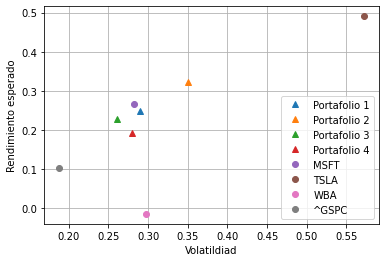

In [129]:
ret = closes.pct_change().dropna()
dataa = pd.DataFrame({"Rendimiento m": ret.mean()*252, "Volatilidad": ret.std()*(252)**0.5}).T

pt.figure()
for i in range(4):
    pt.plot(pdataa.iloc[1, i], pdataa.iloc[0, i], "^", label="Portafolio {}".format(i+1))
for i in range(4):
    pt.plot(dataa.iloc[1, i], dataa.iloc[0, i], "o", label="{}".format(list(dataa.columns.values)[i]))
    
pt.legend()
pt.xlabel("Volatildiad")
pt.ylabel("Rendimiento esperado")
pt.grid()

**Conclusión**

Al ver el gráfico, podemos observar que la mayoría de portafolios se mantienen en una volatilidad bastante similar, al igual que dos de las tres acciones. TESLA es la única acción que tiene una volatilidad muy alta, al mismo tiempo que representa un rendimiento esperado más alto. De la misma forma, el portafolio que prioriza la acción de TESLA (portafolio 2) es el portafolio que más volatilidad tiene, pero igualmente el que representa el mayor rendimiento esperado. 
A pesar de esto, TESLA es una acción que representa un riesgo muy grande proporcional a su rendimiento esperado. 

Si vemos los tres portafolios más cercanos, podemos darnos cuenta que el portafolio 3 conlleva un menor riesgo que el portafolio 4, pero al mismo tiempo representa un mayor rendimiento esperado. Esto significa que el portafolio 4 es una muy mala opción, no tiene ventaja comparativa en ninguno de estos dos parámetros. 

También podemos ver que la acción de Microsoft tiene un mayor rendimiento que el portafolio 1 y también conlleva un menor riesgo, sin embargo, hay que tomar en cuenta que la diferencia no es mucha, por lo que es mejor decisión invertir en portafolio 1 por la diversificación que tiene al ser un portafolio. 

Fuera de estos detalles (más lógicos), la decisión de en que portafolio invertir puede recaer en la proporción de riesgo-rendimiento esperado, tipo de inversionista y datos externos.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>